# LIVER PATIENT PREDICTION

###  In this notebook, I will go through the process of creating a Machine Learning model on Predicting Liver Patients dataset. In this notebook, we wiil predict whether the given person  is suffering with Liver problem or not based on the various Liver-Test related values.

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Getting the Data

In [2]:
df=pd.read_csv("indian_liver_patient.csv")
trdf=pd.read_csv("indian_liver_patient.csv")

### Renaming the Column

In [3]:
df.rename(columns={'Dataset':'condition'}, inplace=True)
trdf.rename(columns={'Dataset':'condition'}, inplace=True)


#  Data Exploration / Analysis and Data Cleaning

In [4]:
trdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  condition                   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#### The training-set has 583 examples and 10 features + the target variable(Outcome). 5 of the features are floats, 5 are integers and 1 is object. 

In [5]:
trdf.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,condition
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### Above we can see the results/outcomes of 583 tests for liver patients. 


In [6]:

trdf.head(15)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,condition
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


### From the above table,we can note a few things. First of all we need to convert Gender column/feature into numeric ones, so that the machine learning algorithms can process them. And then we also need to do some work with null values if present and different datatypes in order to make the machine learning algorithm can process them.

# Data Cleaning

## First transforming data into numerical form

In [7]:

trdf['Gender'] = trdf['Gender'].map({'Male': 1, 'Female': 2})
trdf



,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,condition
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


#### From the above table, we will notice that Male entries are converted into 1 and Female entries are converted into 2

## Searching null values


In [8]:
trdf.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
condition                     0
dtype: int64

#### Feature 'Albumin_and_Globulin_Ratio' have null values.We need to fix them

In [9]:
trdf = trdf.fillna(method='bfill', axis=0).fillna(0)
trdf

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,condition
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [10]:
trdf.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
condition                     0
dtype: int64

#### We wiil notice that all the null values in our dataframe are filled

## Converting float types to integer type

In [11]:
trdf['Total_Bilirubin'] = trdf['Total_Bilirubin'].astype(int)
trdf['Direct_Bilirubin'] = trdf['Direct_Bilirubin'].astype(int)
trdf['Total_Protiens'] = trdf['Total_Protiens'].astype(int)
trdf['Albumin'] = trdf['Albumin'].astype(int)
trdf['Albumin_and_Globulin_Ratio'] = trdf['Albumin_and_Globulin_Ratio'].astype(int)
trdf

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,condition
0,65,2,0,0,187,16,18,6,3,0,1
1,62,1,10,5,699,64,100,7,3,0,1
2,62,1,7,4,490,60,68,7,3,0,1
3,58,1,1,0,182,14,20,6,3,1,1
4,72,1,3,2,195,27,59,7,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0,0,500,20,34,5,1,0,2
579,40,1,0,0,98,35,31,6,3,1,1
580,52,1,0,0,245,48,49,6,3,1,1
581,31,1,1,0,184,29,32,6,3,1,1


### we will notice that all the entries present in our dataframe are converted into integer type for making MachineLearning models more accurate

## Now our data is cleaned and we can use it for further purposes like Data Visualization and Fitting it to Machine Learning Models




# Visualizing data for Analysing and Creating Machine Learning Models

In [12]:
print ('Total Unhealthy Livers : {} '.format(trdf.condition.value_counts()[1]))
print ('Total Healthy Livers : {} '.format(trdf.condition.value_counts()[2]))

Total Unhealthy Livers : 416 
Total Healthy Livers : 167 


### PIE CHART|



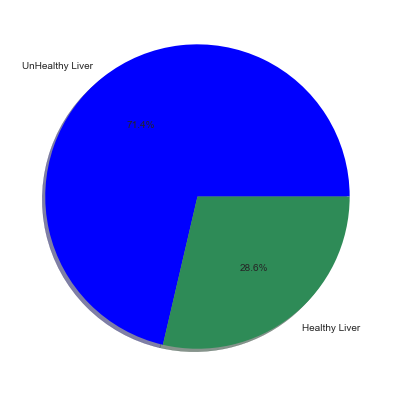

In [13]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(7,7))

plt.pie(x=df["condition"].value_counts(),colors=["blue","seagreen"],labels=["UnHealthy Liver","Healthy Liver"],shadow = True, autopct='%1.1f%%')
plt.show()

### we can notice that 71 percent in our dataframe are suffering with Liver problems

Text(0.5, 1.0, 'Male')

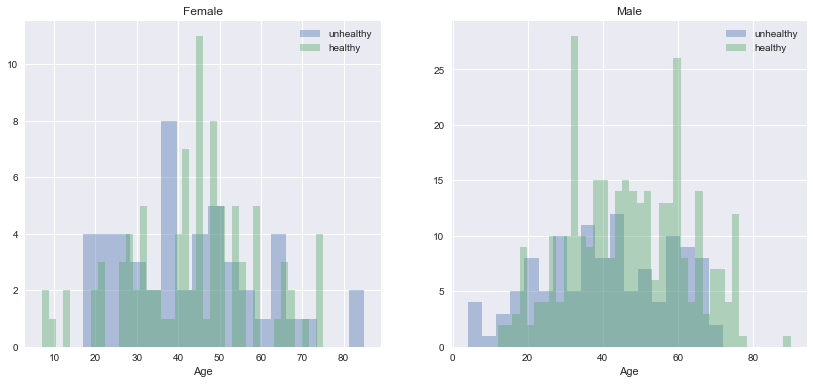

In [14]:

unhealthy = 'unhealthy'
healthy = 'healthy'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14,6))
Female = df[df['Gender']=='Female']
Male = df[df['Gender']=='Male']
ax = sns.distplot(Female[Female['condition']==2].Age.dropna(), bins=18, label = unhealthy, ax = axes[0], kde =False)
ax = sns.distplot(Female[Female['condition']==1].Age.dropna(), bins=40, label = healthy, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(Male[Male['condition']==2].Age.dropna(), bins=18, label = unhealthy, ax = axes[1], kde = False)
ax = sns.distplot(Male[Male['condition']==1].Age.dropna(), bins=40, label = healthy, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

#### In age group 10-18, males are suffering with liver problems as compared to females
#### In age group 18-40, females are less healthier than males

## Histogram 

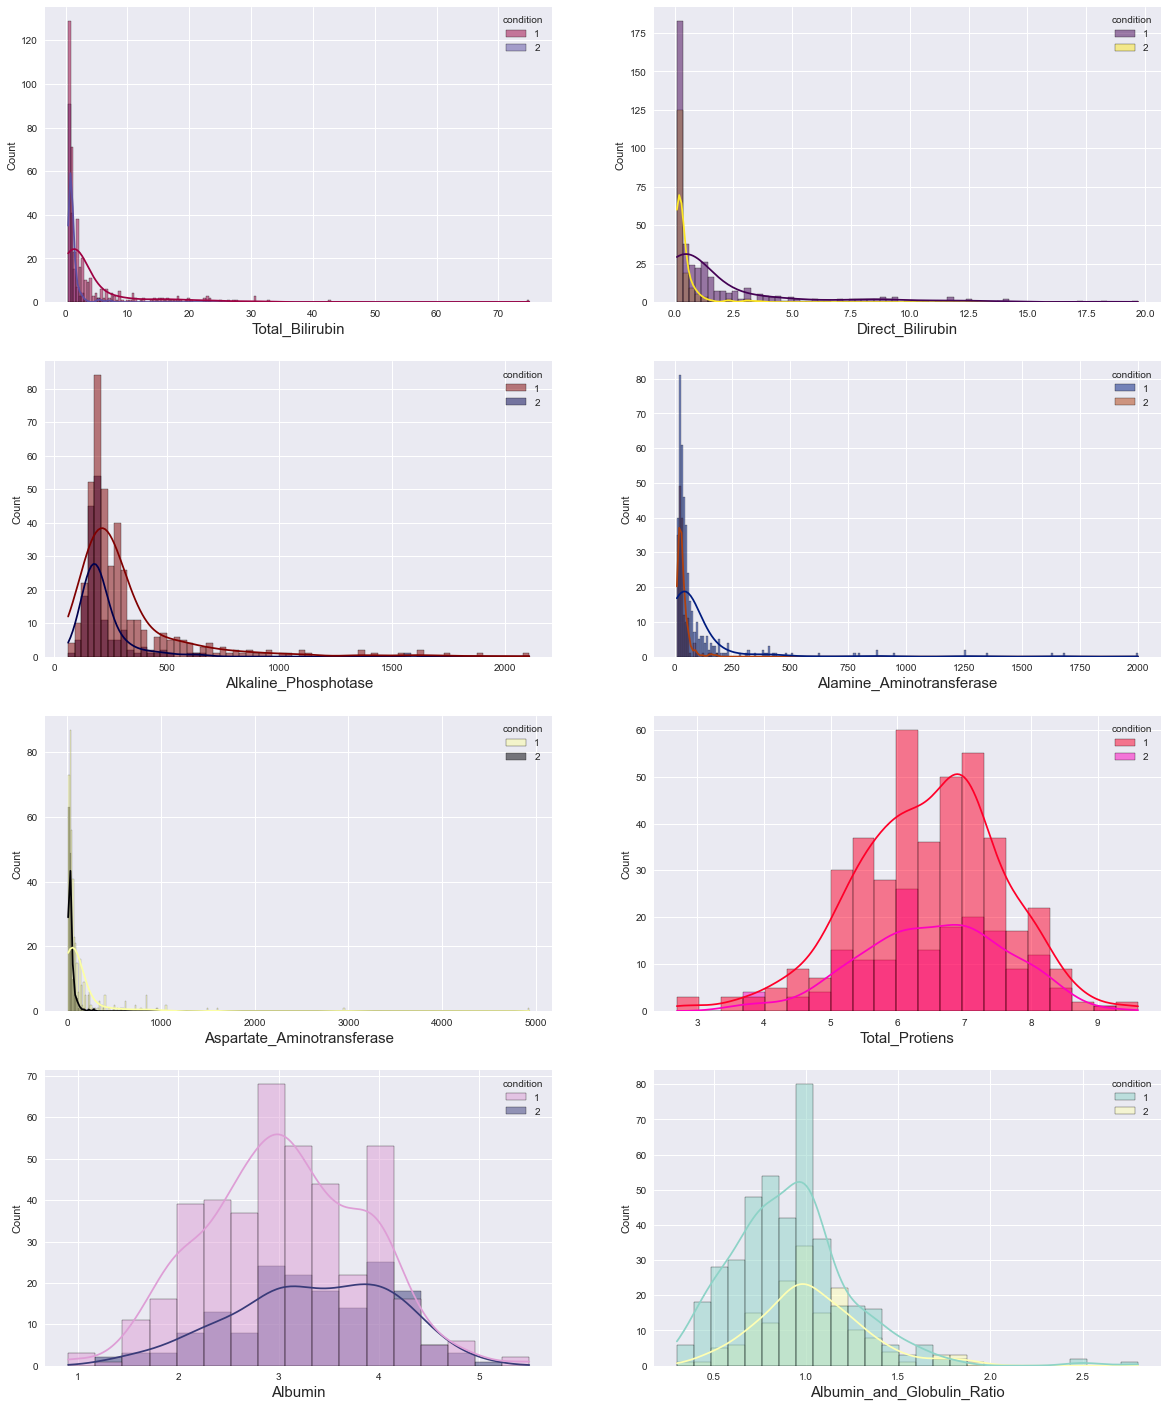

In [15]:

fig, ax =plt.subplots(4,2, figsize=(20,25)) 
plt.style.use("seaborn")

sns.histplot(x = df["Total_Bilirubin"], hue = df["condition"], palette="Spectral", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("Total_Bilirubin",fontsize=15)
sns.histplot(x = df["Direct_Bilirubin"], hue = df["condition"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("Direct_Bilirubin",fontsize=15)


sns.histplot(x = df["Alkaline_Phosphotase"], hue = df["condition"], palette='seismic_r', kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("Alkaline_Phosphotase",fontsize=15)

sns.histplot(x = df["Alamine_Aminotransferase"], hue = df["condition"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("Alamine_Aminotransferase",fontsize=15)


sns.histplot(x = df["Aspartate_Aminotransferase"], hue = df["condition"], palette='inferno_r', kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("Aspartate_Aminotransferase",fontsize=15)

sns.histplot(x = df["Total_Protiens"], hue = df["condition"], palette="gist_rainbow", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("Total_Protiens",fontsize=15)


sns.histplot(x = df["Albumin"], hue = df["condition"], palette="tab20b_r", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("Albumin",fontsize=15)

sns.histplot(x = df["Albumin_and_Globulin_Ratio"], hue = df["condition"], palette="Set3", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("Albumin_and_Globulin_Ratio",fontsize=15);


<AxesSubplot:xlabel='Age', ylabel='Count'>

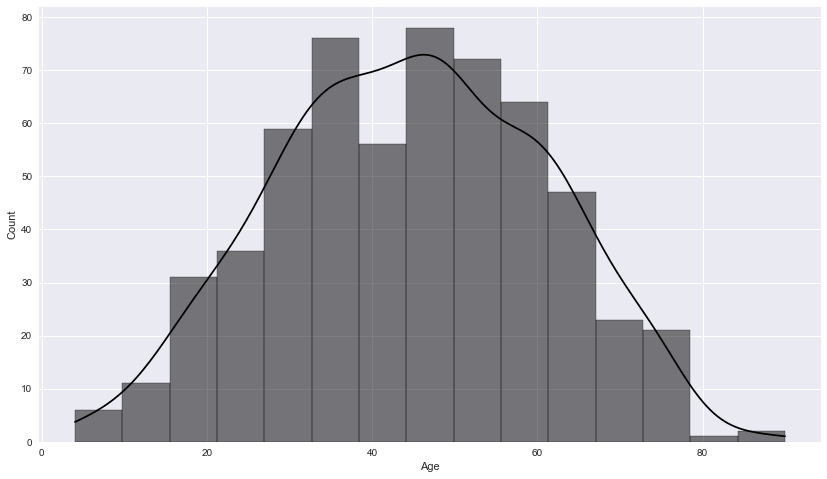

In [16]:
fig, ax = plt.subplots(figsize=(14,8))
sns.histplot(x=df["Age"], kde=True, color='black')

### People with age group in between 45 and 55 are more suffering with Liver problems

## Heatmap for Correlation

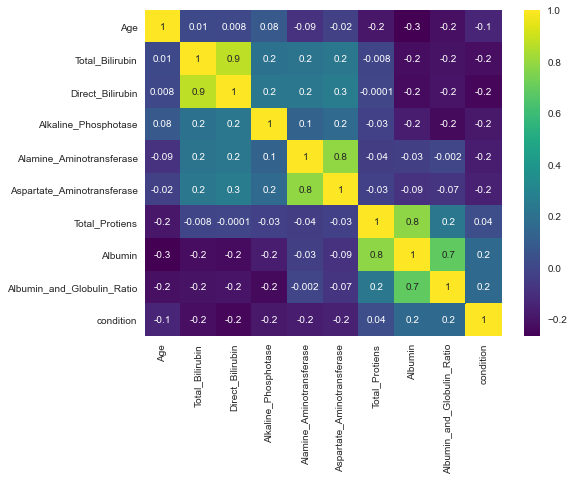

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap='viridis');

# Building Machine Learning Models

## Now we will train several Machine Learning models and compare their results.



In [18]:
X = trdf.drop("condition", axis=1)
X.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,2,0,0,187,16,18,6,3,0
1,62,1,10,5,699,64,100,7,3,0
2,62,1,7,4,490,60,68,7,3,0
3,58,1,1,0,182,14,20,6,3,1
4,72,1,3,2,195,27,59,7,2,0


In [19]:
y = trdf["condition"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: condition, dtype: int64

### Splitting data for Training and Testing

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
len(X_train), len(X_test)

(466, 117)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(X_train, y_train)

LogisticRegression()

In [24]:
LogisticRegressionScore = mod.score(X_test, y_test)


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred_mod = mod.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_mod)
cf_matrix


array([[83,  4],
       [22,  8]], dtype=int64)

Text(0.5, 1.03, 'Confusion Matrix for Logistic Regression')

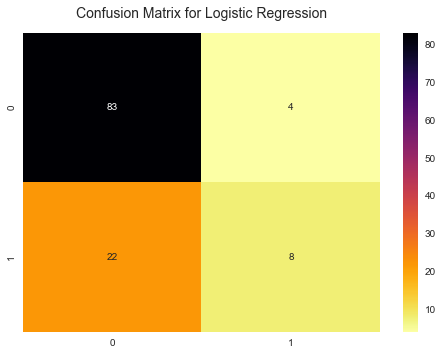

In [26]:
sns.heatmap(cf_matrix, annot=True, cmap='inferno_r')
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, y=1.03)

In [27]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_mod))

              precision    recall  f1-score   support

           1       0.79      0.95      0.86        87
           2       0.67      0.27      0.38        30

    accuracy                           0.78       117
   macro avg       0.73      0.61      0.62       117
weighted avg       0.76      0.78      0.74       117



# RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
RandomForestClassifierScore = rfc.score(X_test, y_test)


In [30]:
y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
cf_matrix


array([[78,  9],
       [18, 12]], dtype=int64)

Text(0.5, 1.03, 'Confusion Matrix for Random Forest Classifier')

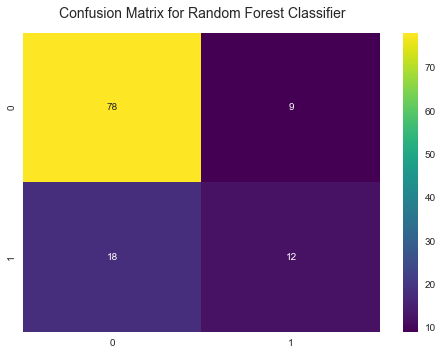

In [31]:
sns.heatmap(cf_matrix, annot=True, cmap="viridis")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14,y=1.03)

In [32]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.81      0.90      0.85        87
           2       0.57      0.40      0.47        30

    accuracy                           0.77       117
   macro avg       0.69      0.65      0.66       117
weighted avg       0.75      0.77      0.75       117



# DecisionTreeClassifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
DecisionTreeClassifierScore = dtc.score(X_test,y_test)


In [35]:
y_pred_dtc = dtc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_dtc)
cf_matrix


array([[57, 30],
       [14, 16]], dtype=int64)

Text(0.5, 1.03, 'Confusion Matrix for Decision Tree Classifier')

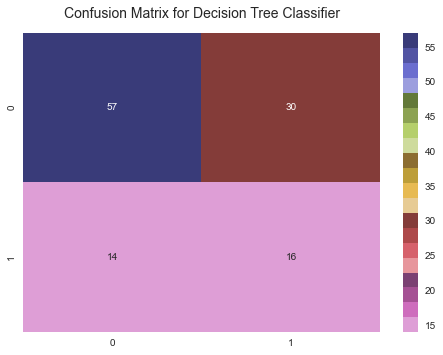

In [36]:
sns.heatmap(cf_matrix, annot=True, cmap="tab20b_r")
plt.title("Confusion Matrix for Decision Tree Classifier", fontsize=14,y=1.03)

In [37]:
print(metrics.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           1       0.80      0.66      0.72        87
           2       0.35      0.53      0.42        30

    accuracy                           0.62       117
   macro avg       0.58      0.59      0.57       117
weighted avg       0.69      0.62      0.64       117



In [38]:
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)
print("Accuracy obtained by Random Forest Classifier model:",RandomForestClassifierScore*100)
print("Accuracy obtained by Decision Tree Classifier model:",DecisionTreeClassifierScore*100)

Accuracy obtained by Logistic Regression model: 77.77777777777779
Accuracy obtained by Random Forest Classifier model: 76.92307692307693
Accuracy obtained by Decision Tree Classifier model: 62.39316239316239


## We will notice that Random Forest Classifier model works with more accuracy when compared to other models

# K-Fold Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train,y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74468085 0.65957447 0.70212766 0.63829787 0.72340426 0.68085106
 0.69565217 0.67391304 0.82608696 0.76086957]
Mean: 0.7105457909343201
Standard Deviation: 0.05248527688931736


# Summary

### We started with the data exploration where we got a feeling for the dataset,checked about missing data and learned which features are important.During this process we used seaborn and matplotllib to do the visualisations. And then we converted features into numeric ones and dropped missing value features. Afterwards we started training MachineLearning models,looked at confusion matrix,computed models precision,recall,f-score and picked one of them(RandomForestClassifier) and applied cross validation on it